In [1]:
# This takes host-star-subtracted frames and plots histograms of the residuals

# created 2019 Oct. 5 by E.S.

In [1]:
import urllib
import numpy as np
import glob
import os
from scipy import ndimage, misc
from astropy.io import fits
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
def shave_and_rotate(img, angle):
    
    edge_size_shave = 150 # shave off the edges
    img_shaved_rotated = ndimage.rotate(img[edge_size_shave:int(np.shape(img)[0]-edge_size_shave),edge_size_shave:int(np.shape(img)[1]-edge_size_shave)], 
                                        angle, reshape=False)

    return img_shaved_rotated

In [3]:
stem = "/Users/nyumbani/Downloads/"

In [4]:
# read in frames with fake planets injected

file_name_array = list(glob.glob(stem+"job_3203135/adi_frame_*.fits"))

file_name_array_recentered = list(glob.glob(stem+"job_3210855/adi_frame_*.fits"))

In [5]:
# read in frames of the other strips (but with no planet)

strip_0_of_4, header = fits.getdata(stem+"job_3204745/adi_frame_129.68_0.01040896_0.0_0.0.fits",0,header=True)
strip_1_of_4, header = fits.getdata(stem+"job_3204751/adi_frame_129.68_0.01040896_0.0_0.0.fits",0,header=True)
strip_2_of_4, header = fits.getdata(stem+"job_3204753/adi_frame_129.68_0.01040896_0.0_0.0.fits",0,header=True)
strip_3_of_4, header = fits.getdata(stem+"job_3204756/adi_frame_129.68_0.01040896_0.0_0.0.fits",0,header=True)
strip_4_of_4, header = fits.getdata(stem+"job_3204759/adi_frame_129.68_0.01040896_0.0_0.0.fits",0,header=True)

In [6]:
# do simple processing of the strips

rotated_strip_0 = shave_and_rotate(strip_0_of_4,angle=39.68)
rotated_strip_1 = shave_and_rotate(strip_1_of_4,angle=19.218)
rotated_strip_2 = shave_and_rotate(strip_2_of_4,angle=13.43)
rotated_strip_3 = shave_and_rotate(strip_3_of_4,angle=6.63)
rotated_strip_4 = shave_and_rotate(strip_4_of_4,angle=-0.04)

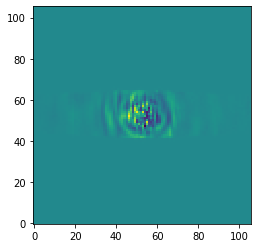

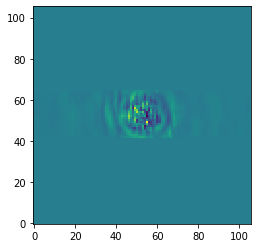

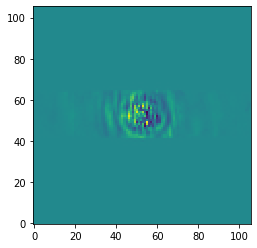

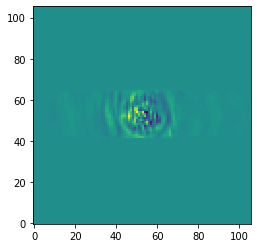

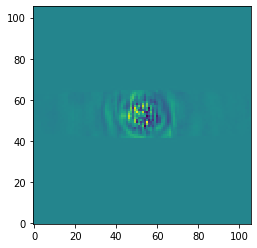

In [7]:
# show the stips without planets

plt.clf()
plt.imshow(rotated_strip_0, origin="lower")
plt.show()

plt.clf()
plt.imshow(rotated_strip_1, origin="lower")
plt.show()

plt.clf()
plt.imshow(rotated_strip_2, origin="lower")
plt.show()

plt.clf()
plt.imshow(rotated_strip_3, origin="lower")
plt.show()

plt.clf()
plt.imshow(rotated_strip_4, origin="lower")
plt.show()

In [8]:
# make dictionaries of marginalizations and cross-sections of strips without any planets

marginalization_dict = {}
cross_sec_dict = {}

marginalization_dict["strip_0"] = np.sum(rotated_strip_0,axis=0)
marginalization_dict["strip_1"] = np.sum(rotated_strip_1,axis=0)
marginalization_dict["strip_2"] = np.sum(rotated_strip_2,axis=0)
marginalization_dict["strip_3"] = np.sum(rotated_strip_3,axis=0)
marginalization_dict["strip_4"] = np.sum(rotated_strip_4,axis=0)

cross_sec_dict["strip_0"] = rotated_strip_1[int(0.5*np.shape(rotated_strip_0)[0]),:]
cross_sec_dict["strip_1"] = rotated_strip_1[int(0.5*np.shape(rotated_strip_1)[0]),:]
cross_sec_dict["strip_2"] = rotated_strip_2[int(0.5*np.shape(rotated_strip_2)[0]),:]
cross_sec_dict["strip_3"] = rotated_strip_3[int(0.5*np.shape(rotated_strip_3)[0]),:]
cross_sec_dict["strip_4"] = rotated_strip_4[int(0.5*np.shape(rotated_strip_4)[0]),:]

In [12]:
# make plots

file_name_array_choice = file_name_array #_recentered
plot_file_name_prefix = ""#"recentered_"

for file_num in range(0,len(file_name_array_choice)):
    
    # find planet location in asec
    planet_loc_asec = float(file_name_array_choice[file_num].split("_")[-3])
    # convert to pixels (as measured from center)
    planet_loc_pix = np.divide(planet_loc_asec,0.0107)
    #print(planet_loc_pix)

    img, header = fits.getdata(file_name_array_choice[file_num],0,header=True)
    img_rotated = shave_and_rotate(img,angle=39.68)

    f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(24, 16))
    #fig = plt.figure(figsize=(8, 6))
    
    # 2D color plot
    subplot1 = ax1.imshow(img_rotated, origin="lower", aspect="auto", vmin=-5000, vmax=5000)
    ax1.axvline(x=0.5*np.shape(img_rotated)[0]-planet_loc_pix, linestyle=":", color="k", linewidth=4, alpha=0.4)
    #plt.colorbar(subplot1)

    # marginalization over y
    marg_this_one = np.sum(img_rotated,axis=0)
    ax2.plot(marginalization_dict["strip_0"], linestyle=":", color="k", alpha=0.2)
    ax2.plot(marginalization_dict["strip_1"], linestyle=":", color="k", alpha=0.2)
    ax2.plot(marginalization_dict["strip_2"], linestyle=":", color="k", alpha=0.2)
    ax2.plot(marginalization_dict["strip_3"], linestyle=":", color="k", alpha=0.2)
    ax2.plot(marginalization_dict["strip_4"], linestyle=":", color="k", alpha=0.2)
    ax2.plot(marg_this_one)
    ax2.axvline(x=0.5*np.shape(img_rotated)[0]-planet_loc_pix, linestyle=":", color="k", linewidth=4, alpha=0.4)
    ax2.set_title('summation')
    ax2.set_ylim([-10000,70000])
    
    # cross-section along x
    cross_sec_this_one = img_rotated[int(0.5*np.shape(img_rotated)[0]),:]
    ax3.plot(cross_sec_dict["strip_0"], linestyle=":", color="k", alpha=0.2)
    ax3.plot(cross_sec_dict["strip_1"], linestyle=":", color="k", alpha=0.2)
    ax3.plot(cross_sec_dict["strip_2"], linestyle=":", color="k", alpha=0.2)
    ax3.plot(cross_sec_dict["strip_3"], linestyle=":", color="k", alpha=0.2)
    ax3.plot(cross_sec_dict["strip_4"], linestyle=":", color="k", alpha=0.2)
    ax3.plot(cross_sec_this_one)
    ax3.axvline(x=0.5*np.shape(img_rotated)[0]-planet_loc_pix, linestyle=":", color="k", linewidth=4, alpha=0.4)
    ax3.set_title('cross-sec')
    ax3.set_ylim([-3000,6000])
    
    # leave a blank in bottom-left, where 'ax4' would be
    
    # plot difference in marginalizations between different strips
    ax5.plot(np.subtract(marg_this_one,marginalization_dict["strip_0"]), label="diff with strip 0 (itself without planet)")
    ax5.plot(np.subtract(marg_this_one,marginalization_dict["strip_1"]), label="diff with strip 1")
    ax5.plot(np.subtract(marg_this_one,marginalization_dict["strip_2"]), label="diff with strip 2")
    ax5.plot(np.subtract(marg_this_one,marginalization_dict["strip_3"]), label="diff with strip 3")
    ax5.plot(np.subtract(marg_this_one,marginalization_dict["strip_4"]), label="diff with strip 4")
    ax5.legend()
    #ax5.set_ylim([-2000,7000]) # for 0.01 companions
    ax5.set_ylim([-10000,70000]) # for 0.1 companions
    ax5.set_title("diff in marginalizations")
    
    # plot difference in cross-sections between different strips
    ax6.plot(np.subtract(cross_sec_this_one,cross_sec_dict["strip_0"]), label="diff with strip 0 (itself without planet)")
    ax6.plot(np.subtract(cross_sec_this_one,cross_sec_dict["strip_1"]), label="diff with strip 1")
    ax6.plot(np.subtract(cross_sec_this_one,cross_sec_dict["strip_2"]), label="diff with strip 2")
    ax6.plot(np.subtract(cross_sec_this_one,cross_sec_dict["strip_3"]), label="diff with strip 3")
    ax6.plot(np.subtract(cross_sec_this_one,cross_sec_dict["strip_4"]), label="diff with strip 4")
    ax6.legend()
    #ax6.set_ylim([-400,700]) # for 0.01 companions
    ax6.set_ylim([-3000,6000]) # for 0.1 companions
    ax6.set_title("diff in cross secs")
    
    new_filename = plot_file_name_prefix + os.path.basename(file_name_array_choice[file_num])+".png"
    f.suptitle(plot_file_name_prefix + os.path.basename(file_name_array_choice[file_num]))
    #plt.tight_layout()
    plt.savefig(new_filename, dpi=150)
    plt.close()
    #plt.show()
    
    print("Saved " + new_filename)

Saved adi_frame_129.68_0.5204479999999999_0.01_0.01.fits.png
Saved adi_frame_129.68_0.031226879999999995_0.01_0.01.fits.png
Saved adi_frame_129.68_0.02081792_0.01_0.01.fits.png
Saved adi_frame_129.68_0.031226879999999995_0.1_0.1.fits.png
Saved adi_frame_129.68_0.04163584_0.01_0.01.fits.png
Saved adi_frame_129.68_0.01040896_0.01_0.01.fits.png
Saved adi_frame_129.68_0.10408959999999999_0.01_0.01.fits.png
Saved adi_frame_129.68_0.31226879999999996_0.01_0.01.fits.png
Saved adi_frame_129.68_0.41635839999999996_0.01_0.01.fits.png
Saved adi_frame_129.68_0.02081792_0.1_0.1.fits.png
Saved adi_frame_129.68_0.20817919999999998_0.1_0.1.fits.png
Saved adi_frame_129.68_0.20817919999999998_0.01_0.01.fits.png
Saved adi_frame_129.68_0.41635839999999996_0.1_0.1.fits.png
Saved adi_frame_129.68_0.06245375999999999_0.1_0.1.fits.png
Saved adi_frame_129.68_0.5204479999999999_0.1_0.1.fits.png
Saved adi_frame_129.68_0.31226879999999996_0.1_0.1.fits.png
Saved adi_frame_129.68_0.04163584_0.1_0.1.fits.png
Saved a